# Reporte de Resultados

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io import arff
import json
pd.set_option('display.max_rows', None)  # This line allows all rows to be displayed
pd.set_option('display.max_columns', None)  # This line allows all columns to be displayed


### Metodología:

En esta documento comparamos experimentos realizados sobre el dataset de 'GCM' en su version original y aumentada.


  


In [41]:
data = pd.read_csv('experiments_results.csv')

In [42]:
data.tail(3)

,experiment_name,date,description,current_dir,POP_SIZE,PROB_MUT,PX,GMAX,DAT_SIZE,all_features_fitness,all_feature_ngenes,all_feature_acc,elite_fitness,elite_ngenes,elite_acc,pob_fitness_avg,pob_accuracy_avg,pob_ngenes_avg,pob_fitness_std,pob_accuracy_std,pob_ngenes_std,pob_fitness_max,pob_accuracy_max,pob_ngenes_max
422,gcm_base_0040_2,2024-06-13,gene01_mut160_cvaelossL1_genevalonsyn_gatraino...,/root/ealab/expga1,100,160,0.75,20,144,0.076,16063,0.152,0.713,1548,0.522,0.713,0.522,1548.0,0.0,0.0,0.0,0.713,0.522,1548
423,gcm_base_0040_3,2024-06-14,gene01_mut160_cvaelossL1_genevalonsyn_gatraino...,/root/ealab/expga1,100,160,0.75,20,144,0.076,16063,0.152,0.701,1566,0.500,0.701,0.500,1566.0,0.0,0.0,0.0,0.701,0.500,1566
424,gcm_base_0040_4,2024-06-14,gene01_mut160_cvaelossL1_genevalonsyn_gatraino...,/root/ealab/expga1,100,160,0.75,20,144,0.076,16063,0.152,0.714,1500,0.522,0.714,0.522,1500.0,0.0,0.0,0.0,0.714,0.522,1500


In [43]:
gcm = data[data['experiment_name'].str.contains('gcm')]
# extract the firts 18 letters of the experiment name
gcm['experiment_group'] = gcm['experiment_name'].apply(lambda x: x[:13])
# count the unique value on the column 'experiment_name'
gcm['experiment_group'].value_counts()

/tmp/ipykernel_235878/1542720263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gcm['experiment_group'] = gcm['experiment_name'].apply(lambda x: x[:13])


experiment_group
gcm_base_0026    5
gcm_base_0027    5
gcm_base_0029    5
gcm_base_0030    5
gcm_base_0040    5
gcm_base_0038    4
gcm_base_0036    3
gcm_base_0037    3
gcm_base_0039    3
gcm_base_0028    2
gcm_base_0034    2
gcm_base_0035    2
gcm_base_0031    1
gcm_base_0032    1
gcm_base_0033    1
Name: count, dtype: int64

#### Experimentos excluidos

Excluiremos del análisis experimentos madelon_base_004 por ser un experimento de 10 pruebas iniciales.

In [44]:
# Remove 'leukemia_base_0008' from the data
#gcm = gcm[gcm['experiment_group'] != 'gcm_base_0008']


In [45]:
# Compare original data vs augmented data
original_data = ['gcm_base_0026', 'gcm_base_0037', 'gcm_base_0038', 'gcm_base_0039', 'gcm_base_0040']

In [46]:
gcm.head()

,experiment_name,date,description,current_dir,POP_SIZE,PROB_MUT,PX,GMAX,DAT_SIZE,all_features_fitness,all_feature_ngenes,all_feature_acc,elite_fitness,elite_ngenes,elite_acc,pob_fitness_avg,pob_accuracy_avg,pob_ngenes_avg,pob_fitness_std,pob_accuracy_std,pob_ngenes_std,pob_fitness_max,pob_accuracy_max,pob_ngenes_max,experiment_group
378,gcm_base_0026_0,2024-05-27,experiments_original_data,/root/ealab/expga1,100,1,0.75,30,144,0.163,16063,0.326,0.742,1644,0.587,0.742,0.587,1644.0,0.0,0.0,0.0,0.742,0.587,1644,gcm_base_0026
379,gcm_base_0027_0,2024-05-27,experiments_synthetic_data,/root/ealab/expga1,100,1,0.75,30,144,0.076,16063,0.152,0.589,1593,0.276,0.589,0.276,1593.0,0.0,0.0,0.0,0.589,0.276,1593,gcm_base_0027
380,gcm_base_0026_1,2024-05-27,experiments_original_data,/root/ealab/expga1,100,1,0.75,30,144,0.163,16063,0.326,0.712,1562,0.522,0.712,0.522,1562.0,0.0,0.0,0.0,0.712,0.522,1562,gcm_base_0026
381,gcm_base_0026_2,2024-05-28,experiments_original_data,/root/ealab/expga1,100,1,0.75,30,144,0.163,16063,0.326,0.766,1574,0.630,0.766,0.630,1574.0,0.0,0.0,0.0,0.766,0.630,1574,gcm_base_0026
382,gcm_base_0027_1,2024-05-28,experiments_synthetic_data,/root/ealab/expga1,100,1,0.75,30,144,0.076,16063,0.152,0.589,1585,0.276,0.589,0.276,1585.0,0.0,0.0,0.0,0.589,0.276,1585,gcm_base_0027


In [47]:
# add a column to the data to identify the original data
gcm['original_data'] = gcm['experiment_group'].apply(lambda x: 'original' if x in original_data else 'augmented')


/tmp/ipykernel_235878/808205572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gcm['original_data'] = gcm['experiment_group'].apply(lambda x: 'original' if x in original_data else 'augmented')


In [24]:
gcm.head()

,experiment_name,date,description,current_dir,POP_SIZE,PROB_MUT,PX,GMAX,DAT_SIZE,all_features_fitness,all_feature_ngenes,all_feature_acc,elite_fitness,elite_ngenes,elite_acc,pob_fitness_avg,pob_accuracy_avg,pob_ngenes_avg,pob_fitness_std,pob_accuracy_std,pob_ngenes_std,pob_fitness_max,pob_accuracy_max,pob_ngenes_max,experiment_group,original_data
378,gcm_base_0026_0,2024-05-27,experiments_original_data,/root/ealab/expga1,100,1,0.75,30,144,0.163,16063,0.326,0.742,1644,0.587,0.742,0.587,1644.0,0.0,0.0,0.0,0.742,0.587,1644,gcm_base_0026,original
379,gcm_base_0027_0,2024-05-27,experiments_synthetic_data,/root/ealab/expga1,100,1,0.75,30,144,0.076,16063,0.152,0.589,1593,0.276,0.589,0.276,1593.0,0.0,0.0,0.0,0.589,0.276,1593,gcm_base_0027,augmented
380,gcm_base_0026_1,2024-05-27,experiments_original_data,/root/ealab/expga1,100,1,0.75,30,144,0.163,16063,0.326,0.712,1562,0.522,0.712,0.522,1562.0,0.0,0.0,0.0,0.712,0.522,1562,gcm_base_0026,original
381,gcm_base_0026_2,2024-05-28,experiments_original_data,/root/ealab/expga1,100,1,0.75,30,144,0.163,16063,0.326,0.766,1574,0.630,0.766,0.630,1574.0,0.0,0.0,0.0,0.766,0.630,1574,gcm_base_0026,original
382,gcm_base_0027_1,2024-05-28,experiments_synthetic_data,/root/ealab/expga1,100,1,0.75,30,144,0.076,16063,0.152,0.589,1585,0.276,0.589,0.276,1585.0,0.0,0.0,0.0,0.589,0.276,1585,gcm_base_0027,augmented


# Resultados

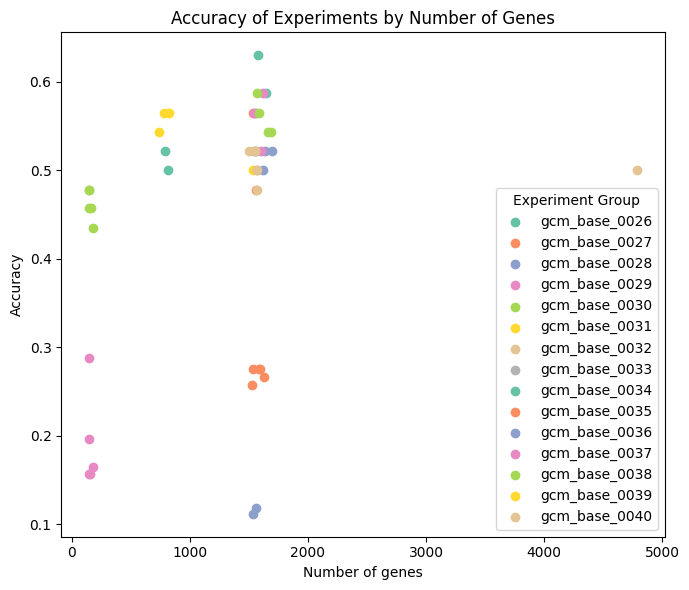

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Factorize the 'experiment_group' to get labels and unique ids
groups, labels = pd.factorize(gcm['experiment_group'])

# Set up the matplotlib figure
plt.figure(figsize=(7, 6))

# Plot all data without condition on 'pob_ngenes_avg'
for i, label in enumerate(labels):
    group_data = gcm[groups == i]
    plt.scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)

# Set plot titles and labels
plt.title('Accuracy of Experiments by Number of Genes')
plt.xlabel('Number of genes')
plt.ylabel('Accuracy')

# Add a legend to the plot
plt.legend(title="Experiment Group")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

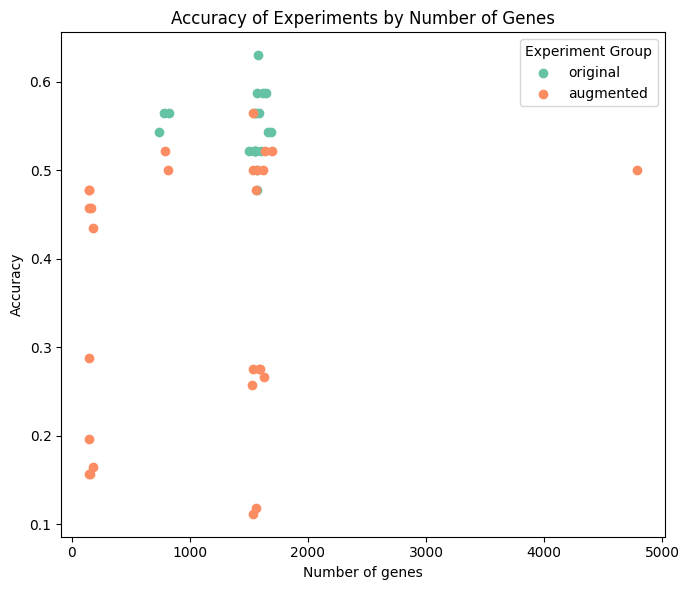

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Factorize the 'experiment_group' to get labels and unique ids
groups, labels = pd.factorize(gcm['original_data'])

# Set up the matplotlib figure
plt.figure(figsize=(7, 6))

# Plot all data without condition on 'pob_ngenes_avg'
for i, label in enumerate(labels):
    group_data = gcm[groups == i]
    plt.scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)

# Set plot titles and labels
plt.title('Accuracy of Experiments by Number of Genes')
plt.xlabel('Number of genes')
plt.ylabel('Accuracy')

# Add a legend to the plot
plt.legend(title="Experiment Group")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Gráfico de resultados por grupo de experimentos

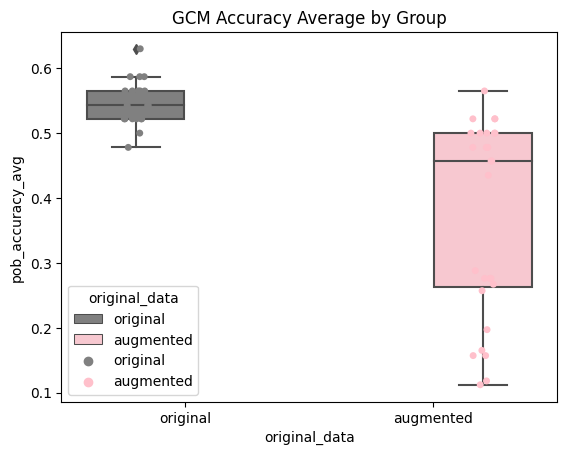

In [39]:
# Define a custom palette with swapped colors
custom_palette = {
    'original': 'gray',  # Color previously used for synthetic
    'augmented': 'pink'  # Color previously used for original
}

# Plot the leukemias accuracy average by group with swapped colors
sns.boxplot(x='original_data', y='pob_accuracy_avg', data=gcm, hue='original_data', palette=custom_palette)
# Add data points with the same palette
sns.stripplot(x='original_data', y='pob_accuracy_avg', data=gcm, hue='original_data', palette=custom_palette, dodge=True)
plt.title('GCM Accuracy Average by Group')
plt.show()




# Clasifiación mediante un MLP de los datos de GCM

La generación de datos sintéticos y posterior entrenamiento de un MLP para clasificar los datos de GCM, arrojó los siguientes resultados:


La evaluación se hace en datos de testeo sintéticos, por lo que el modelo no ha sido entrenado con estos datos.
La precisión del modelo es de 99.52%, demostrando las distribuciones de probabilidad de las clases están bien definidas y separadas. 
Sin embargo cuando se prueba este MLP con los datos reales la performance cae a 0.5, lo que indica que el modelo no es capaz de generalizar a datos reales. 
Esto está señalando que el VAE no está generando datos que sean representativos de los datos reales, y por lo tanto el MLP no puede generalizar a estos datos. 
Posiblemente esta circunstancia indica que la divergencia KL tiene un error menor que el error de reconstrucción, lo que hace que el VAE no sea capaz de generar datos que sean representativos de los datos reales, pero sí es capaz de generar un espacio latente que es capaz de separar las clases de los datos sintéticos. 
Por lo tanto tiene que explorarse la posibilidad de ajustar los pesos de la divergencia KL y la reconstrucción para que el VAE sea capaz de generar datos que sean representativos de los datos reales. Se puede buscar una arquitectura de VAE donde la divergencia KL tenga un peso menor que el error de reconstrucción forzando al VAE a generar datos que sean representativos de los datos reales.

